### VP of Product: Which product line should we expand?

- Is there a product category that is particularly profitable for us?
- Does one or another stand out in terms of sales volume? 
- Does this vary by customer segment?

In [1]:
from env import get_db_url
import pandas as pd
import prepare

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 22})

In [3]:
# df = acquire_stephen.get_superstore_data()

In [4]:
df = prepare.prepare_superstore_data()

Reading csv file..


Text(0.5, 1.0, 'Monthly Sales Volume (Quantity)')

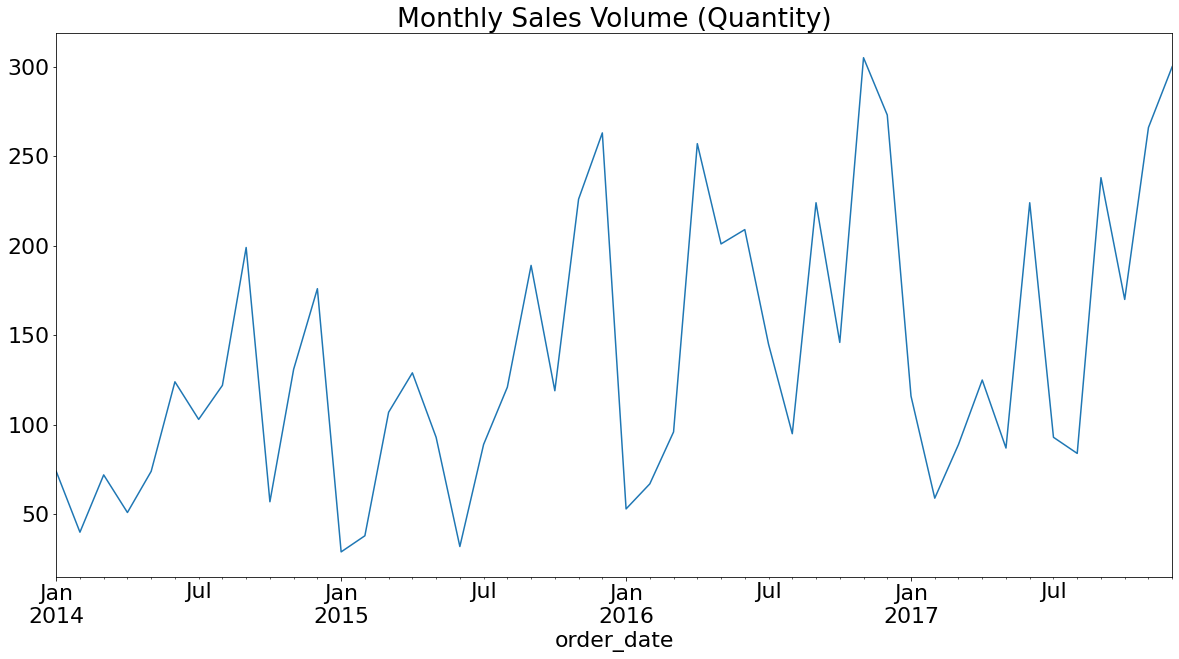

In [5]:
df.resample('M').sum().quantity.plot()
plt.title("Monthly Sales Volume (Quantity)")

Text(0.5, 1.0, 'Monthly Profit')

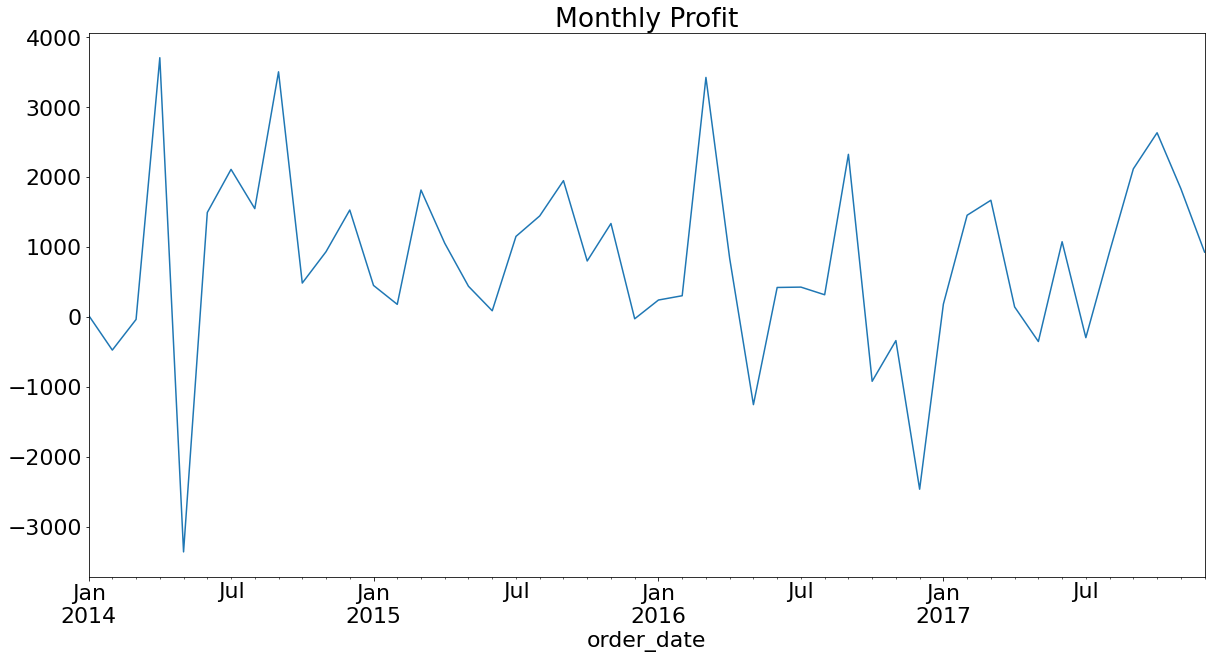

In [6]:
df.resample('M').sum().profit.plot()
plt.title("Monthly Profit")

## Split data

In [7]:
train = df.loc['2014':'2015']
validate = df.loc['2016']
test = df.loc['2017']

## Total profit by subcategory

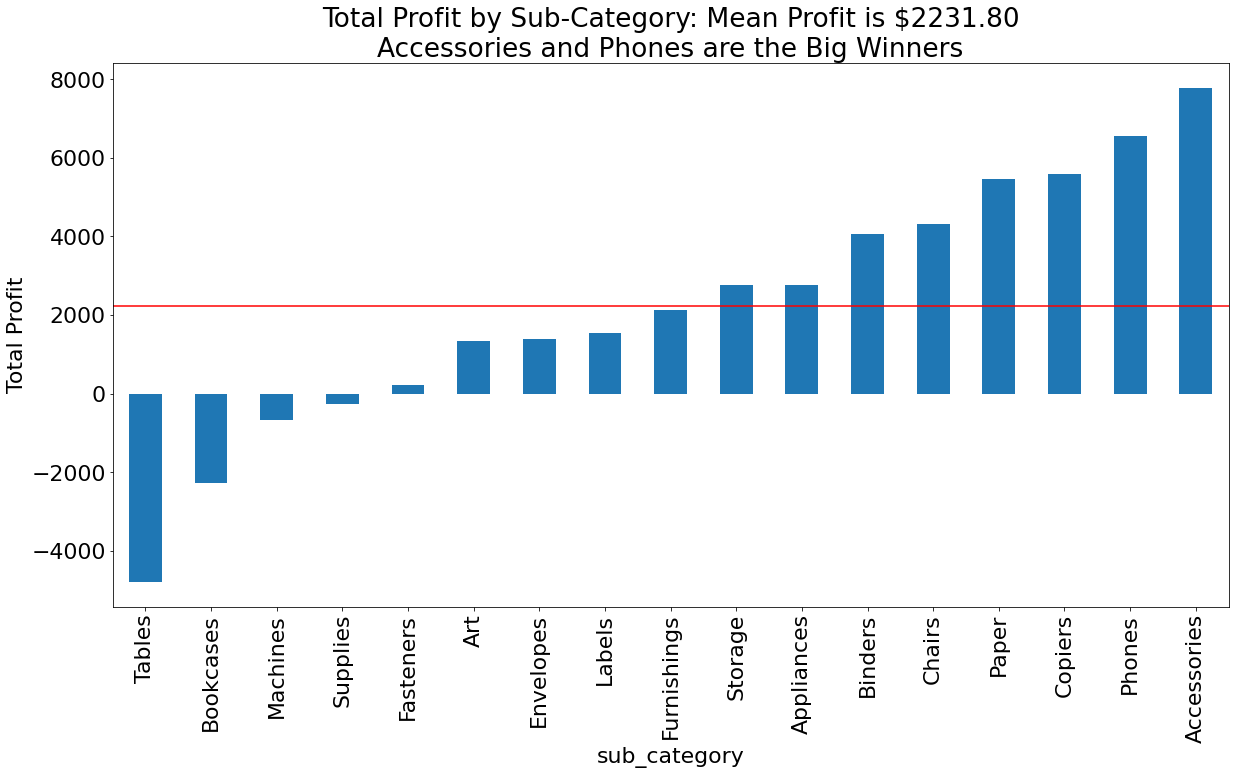

In [8]:
mean_profit = df.groupby("sub_category").profit.sum().mean()
df.groupby("sub_category").profit.sum().sort_values().plot.bar()
plt.title(f'Total Profit by Sub-Category: Mean Profit is ${mean_profit:.2f}\nAccessories and Phones are the Big Winners')
plt.ylabel('Total Profit')
plt.axhline(mean_profit, color='r')

## Profit by category

In [9]:
df.groupby("category").profit.sum()

category
Furniture           -623.2451
Office Supplies    19312.4297
Technology         19251.3447
Name: profit, dtype: float64

In [10]:
for cat in train["category"].unique():
    overall_mean = train.groupby("category").profit.sum().mean()
    sample = train[train["category"] == cat].profit
    t,p = stats.ttest_1samp(sample, overall_mean)
    print(cat, t, p/2>0.05)

Furniture -678.1577573942145 False
Office Supplies -890.5492472685994 False
Technology -210.8489160615215 False


### How does sales volume change overall?

### How does the sales volume change by category?

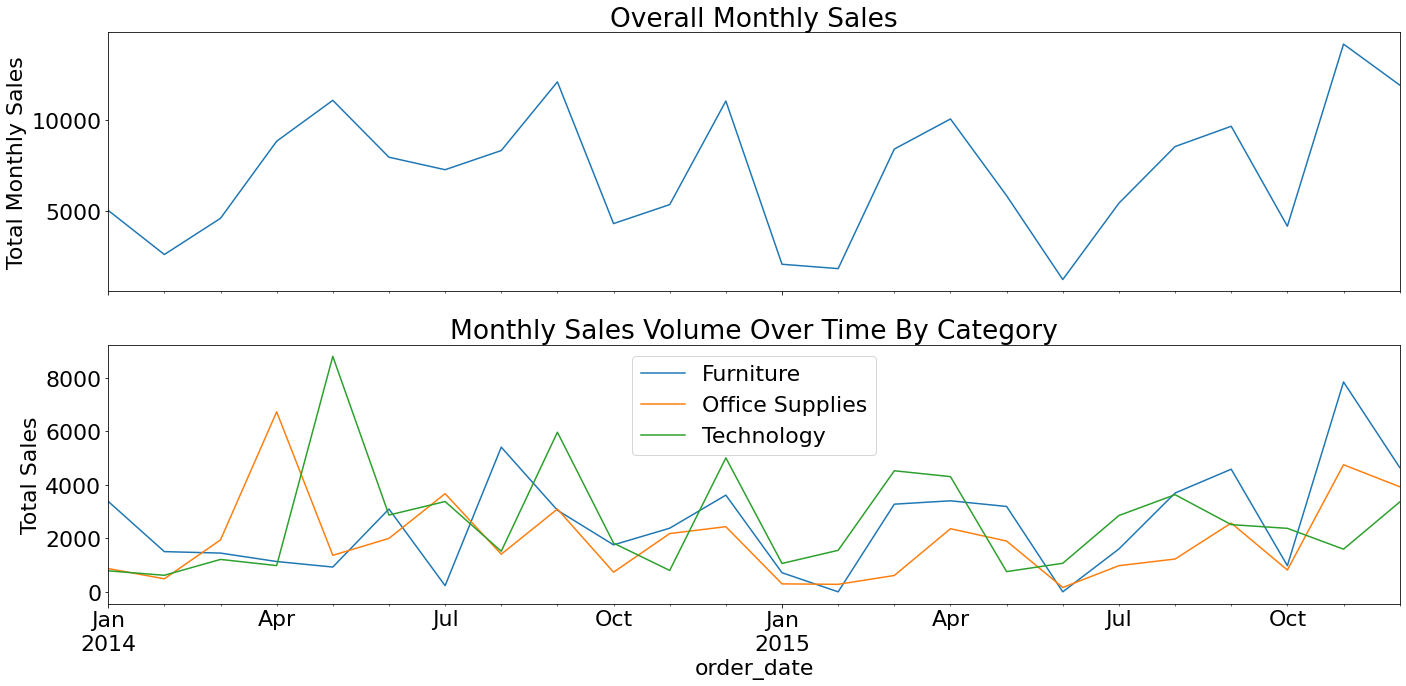

In [11]:
fig, axs= plt.subplots(2, sharex=True)

train.resample('M').sales.sum().plot(ax=axs[0])
axs[0].set_title('Overall Monthly Sales')
axs[0].set_ylabel('Total Monthly Sales')
# plt.show()

for cat in train.category.unique():
    sample = train[train.category == cat]
    sample.resample('M').sales.sum().plot(label=cat, ax=axs[1])
    plt.legend()
axs[1].set_title("Monthly Sales Volume Over Time By Category")
# plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.tight_layout()

## Takeaway:
- Furniture and Technology sales seem to follow similar trends: when you buy a new computer you need a new desk?
- Technology sales are generally higher than the other two categories
- Office Supplies is generally lower in total sales than the other two categories
- No clear seasonality is discernable from this chart

### How does sales volume change by category for each customer segment (Consumer, Corporate, Home Office)

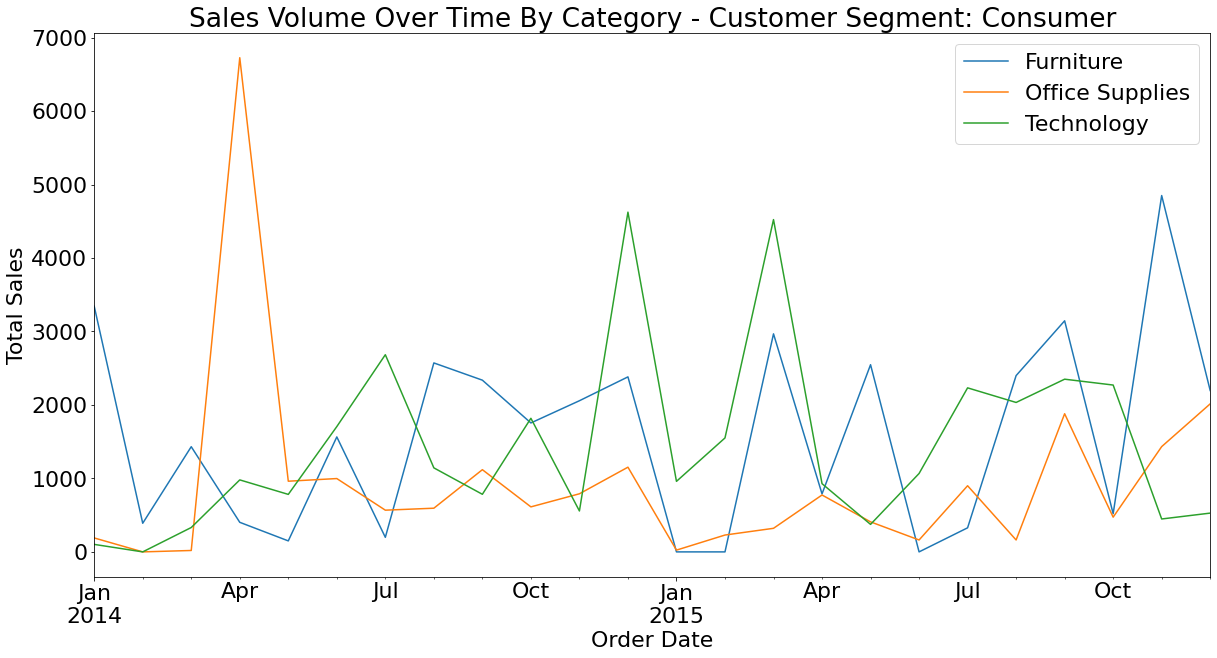

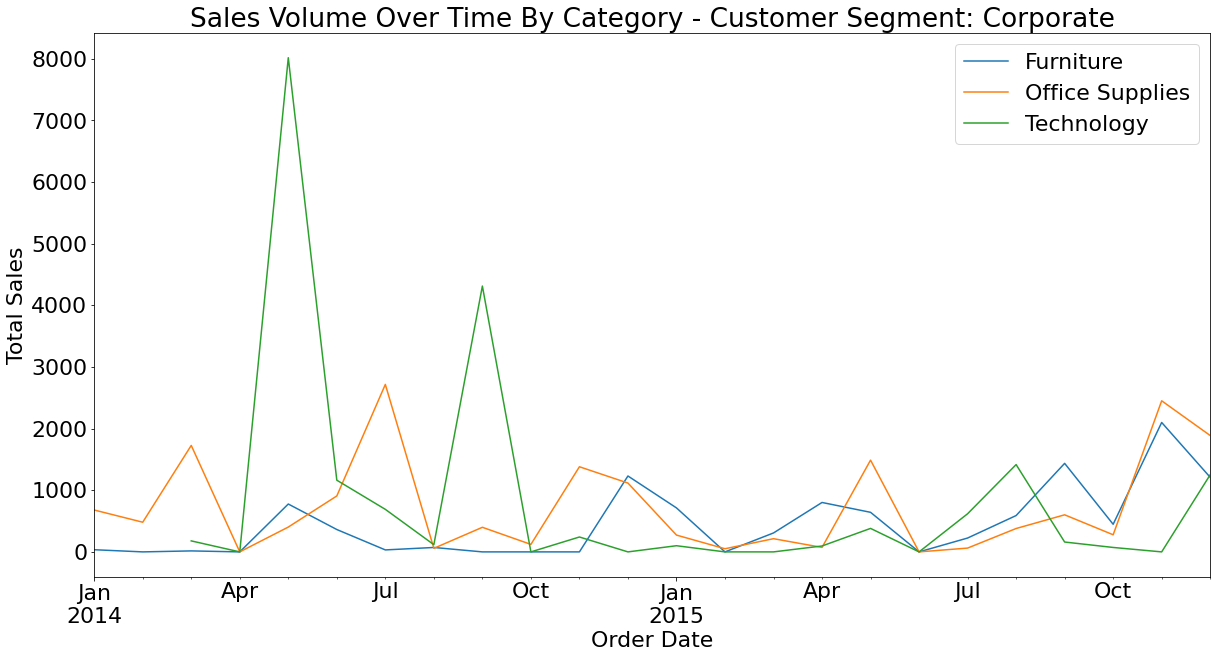

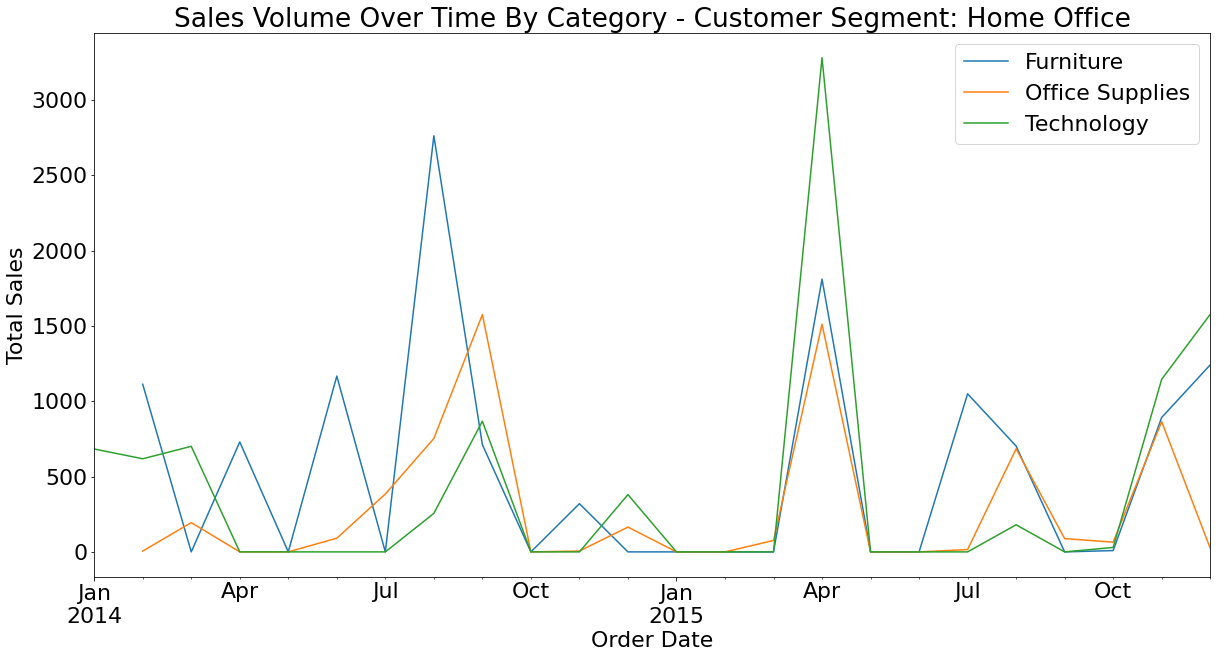

In [12]:
# Plot sales volume by category - different plot for each customer segment
for seg in train.segment.unique():
    for cat in train.category.unique():
        sample = train[(train.category == cat)&(train.segment == seg)]
        sample.resample('M').sales.sum().plot(label=cat)
        plt.legend()
    plt.title(f"Sales Volume Over Time By Category - Customer Segment: {seg}")
    plt.xlabel("Order Date")
    plt.ylabel("Total Sales")
    plt.show()

### Consumer Customer Segment:
- With the exception of a big spike in office supply volume in April 2014, office supplies are nearly always the lowest in sales volume

### Corporate Customer Segment:
- In contrast, with the exception of a big spike in technology in May 2014, technology is generally pretty low for corporate customers

### Home office segment:
- Sales volume generally quite low overall. Big spikes in all categories in April 2015 , sale?

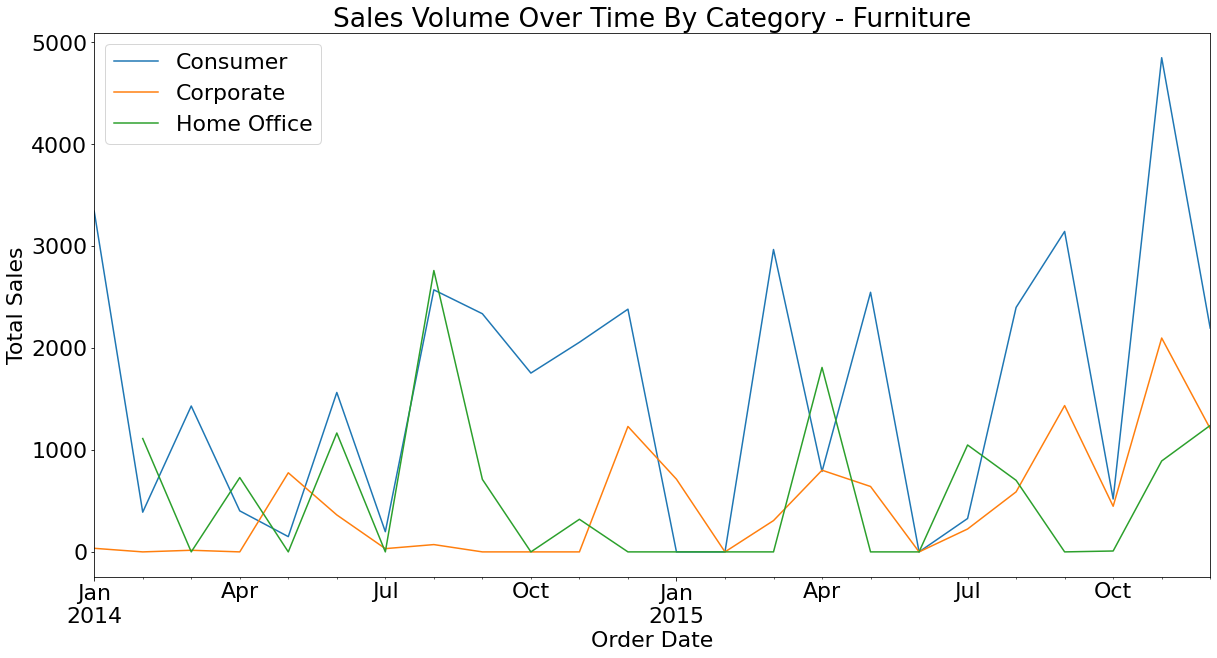

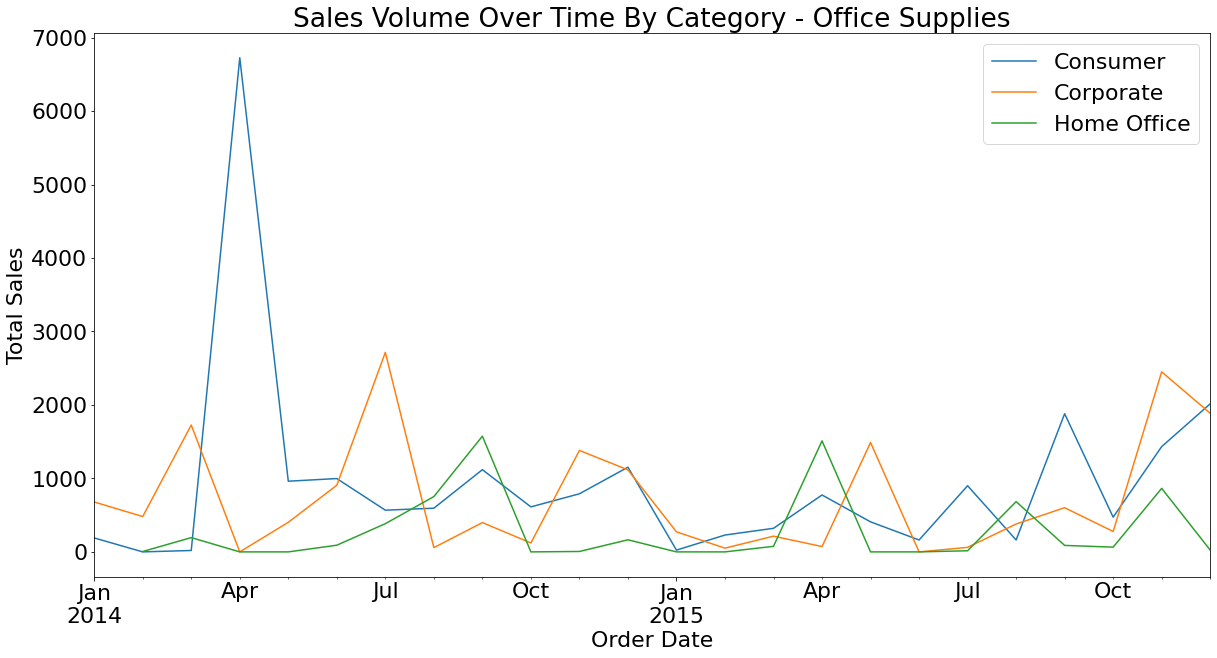

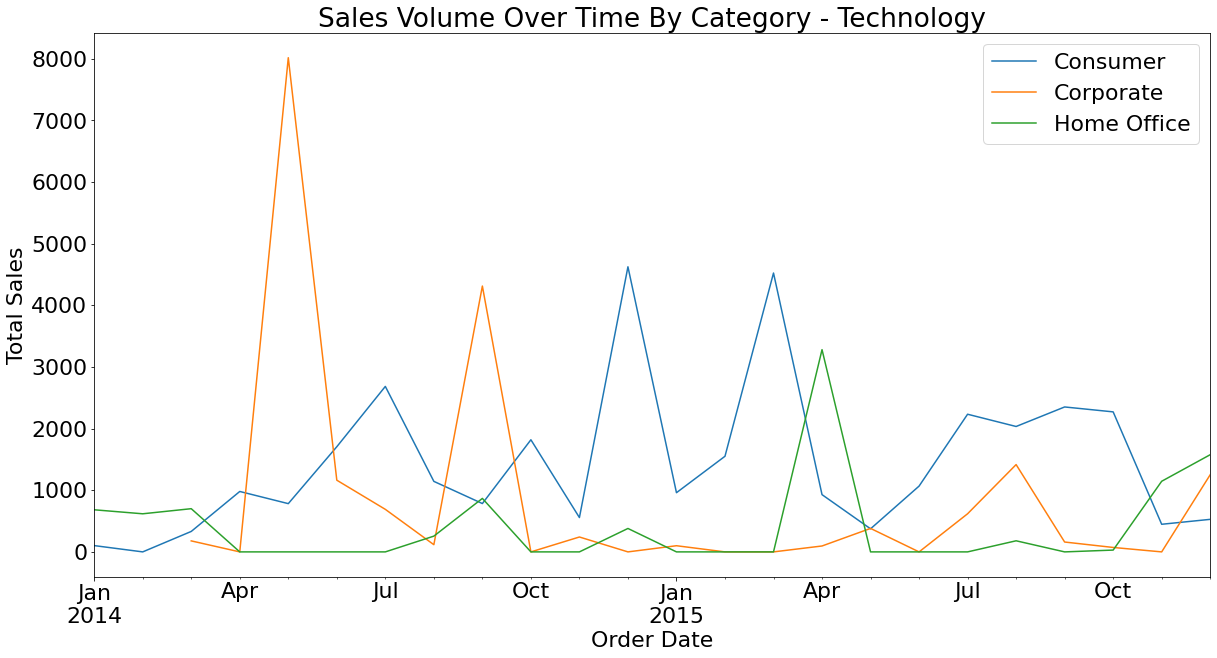

In [17]:
# Plot sales volume by category - different plot for each product category

for cat in train.category.unique():
    for seg in train.segment.unique():
        sample = train[(train.category == cat)&(train.segment == seg)]
        sample.resample('M').sales.sum().plot(label=seg)
        plt.legend()
    plt.title(f"Sales Volume Over Time By Category - {cat}")
    plt.xlabel("Order Date")
    plt.ylabel("Total Sales")
    plt.show()